# Covid-19 deaths statistic in Portugal

In [1]:
# ========================== LIBRARIES ======================================
# Scientific Computing libraries
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import stats
# Data Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ========================== DATA READING ===================================

# Extract Data deaths in Portugal from 2009-2020
data1=pd.read_csv("Data/Dados_SICO_2020-12-30-Nr_mortes.csv")

data2=pd.read_csv("Data/owid-covid-data.csv") # data covid all countries
# Extract Data Covid from Portugal
data2=data2.loc[data2['iso_code'] == 'PRT'] # data covid Portugal

In [3]:
# ========================== DATA ANALYSIS ==================================
# Data 1 - Deaths in PT
dy = data1.sum()
dy=dy.to_frame()
dy.drop(axis=0,index="Data",inplace=True)
dy.rename(columns={0:"Deaths"},inplace=True)
dc20=6906
dy.loc['2020','Deaths']=dy.loc['2020','Deaths']-dc20
dy.reset_index(inplace=True)
dy.rename(columns={"index":"Year"},inplace=True)

In [4]:
# Data 2 - Covid Numbers PT
# Create variable with number of deaths by month from 2015-2020
year=2015
num_years=2021-year
pt_deaths_total_month = np.zeros((13,num_years))
pt_deaths_total_month[0,[0,1,2,3,4,5]] = range(2015,2021)

year=2015
days_per_month=[31,29,31,30,31,30,31,31,30,31,30,31]
j=0
i=1
n=0
sum_days = days_per_month[0]-1

for i in range(1,13):    # Cycle per each month
    for j in range(0,6):    # Cycle per each year
        year_str=str(year)
        temp = data1.loc[n:sum_days,year_str]
        pt_deaths_total_month[i,j] = temp.sum()
        year=year+1
    year=2015    
    n=n+days_per_month[i-1]
    if i != 12:
        sum_days = sum_days+days_per_month[i]

dm = pd.DataFrame(pt_deaths_total_month)

In [5]:
# Data 2 - Covid deaths and number of cases
df=data2.loc[:,["date","new_cases","new_deaths"]]
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)
df['new_cases']=df['new_cases'].fillna(0) #replace NaN by zeros
df['new_deaths']=df['new_deaths'].fillna(0) #replace NaN by zeros
df['month'] = pd.DatetimeIndex(df['date']).month
total=df.groupby('month')['new_cases','new_deaths'].sum()
total.loc[1,:]=0

<ipython-input-5-75aa5b18a633>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total=df.groupby('month')['new_cases','new_deaths'].sum()


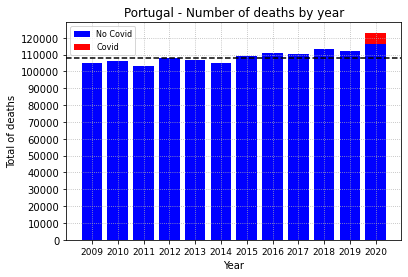

In [6]:
# PLOT 1: Number of deaths in Portugal by year
array=[0,0,0,0,0,0,0,0,0,0,0,dc20]
average=dy.iloc[0:10,1].mean()

plt.bar(dy.loc[:,'Year'],dy.loc[:,'Deaths'],color="b",label="No Covid")
plt.bar(dy.loc[:,'Year'],array,bottom=dy.loc[:,'Deaths'],color="r",label="Covid")
plt.axhline(y = average, color = 'k', linestyle = '--')
plt.title('Portugal - Number of deaths by year')
plt.grid(linestyle=':')
plt.yticks(np.arange(0,130000,10000))
plt.xticks(fontsize=9)
plt.xlabel("Year")
plt.ylabel("Total of deaths")
plt.legend(fontsize=8)

In the graph above it's possible to verify the difference of the number of deaths in Portugal between 2009 and 2020. The average of deaths between 2009 and 2019 is signaled with the horizontal black dashed line in the plot, near the 110000 deaths per year.
Covid-19 had a big impact on the total number of deaths in 2020 not only because of the deaths by the virus but also due to the increase of deaths by other reasons. It's possible to see in the 2020 bar where the No-Covid deaths are superior than any year since 2009. The increase of deaths by other factors might be explained by a decrease of the number of surgeries, treatments or even by the fear of some people to go to hospitals due to the pandemic.

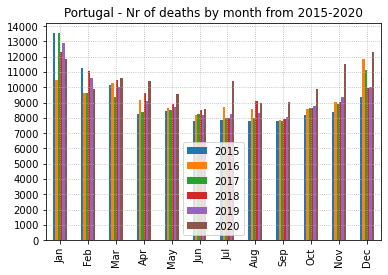

In [7]:
# PLOT 2: Number of deaths in Portugal by month during 2015-2020
rows2=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
columns2=['2015','2016','2017','2018','2019','2020']
df2=pd.DataFrame(data=pt_deaths_total_month[1:13,:],index=rows2,columns=columns2)
df2.plot.bar()
plt.title('Portugal - Nr of deaths by month from 2015-2020')
plt.yticks(np.arange(0, 15000, 1000))
plt.grid(linestyle=':')

In the plot 2 it's possible to check the number of deaths by month from 2015-2020. The pandemic started to have impact in Portugal in the number of deaths in April, where it's already visible the brown line (2020) as dominant until the end of the year, with the exception of August. This exception might be explained by being a very common month to take vacations, which reduces the movement to work and public transportation, which consequently reduces the risk of contagion by the Corona Virus. Also the hot weather can be an important factor for people being more in open spaces, where the risk is also minor. It's important to note also that the number of deaths in August of 2018 was significantly higher than the average of the remaining years.

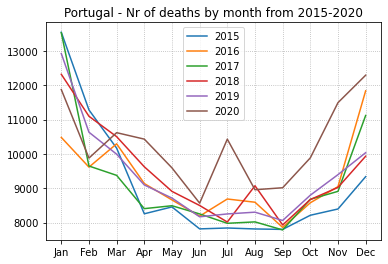

In [8]:
# PLOT 3
df2.plot()
plt.title('Portugal - Nr of deaths by month from 2015-2020')
plt.xticks(np.arange(12), rows2)
plt.grid(linestyle=':')
plt.show()

in the plot above is represented another way of seeing the same data as the graphic before, a statistic of the number of deaths by month from 2015 to 2020. In this plot it's easier to verify that after the start of the first death by Covid-19 in Portugal (in March), the total number of deaths in Portugal in 2020 was always higher than the years before with the small exception of August.

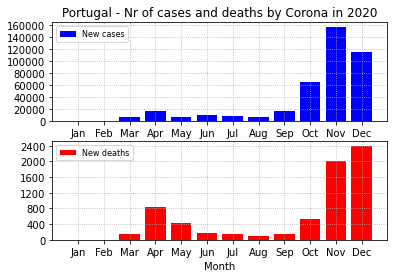

In [9]:
# PLOT 4
plt.subplot(2,1,1)
plt.title('Portugal - Nr of cases and deaths by Corona in 2020')
plt.bar(rows2,total.loc[:,'new_cases'],color="b",label="New cases")
plt.xlabel("Month")
plt.yticks(np.arange(0, 165000, 20000))
plt.legend(fontsize=8)
plt.grid(linestyle=':')

plt.subplot(2,1,2)
plt.bar(rows2,total.loc[:,'new_deaths'],color="r",label="New deaths")
plt.xlabel("Month")
plt.yticks(np.arange(0, 2500, 400))
plt.legend(fontsize=8)
plt.grid(linestyle=':')

In the plot 4 it's present a visual representation of the number of new cases and deaths by Covid-19 on each month of the year 2020. 
It's possible to check two different peaks in April and November that can respectively represent the top of the 1st and 2nd Covid-19 waves in Portugal. The second wave has much higher intensity than the 1st one which might be explained by some of the government restriction decisions, for example in March/April there was a lockdown of 45 days which did not happen in the remaining months of the year. Another factor that can be relevant is that in the beginning of the pandemic, due to the lack of information about the virus, people seemed to be more scared and willing to obey more to social distancing measures to avoid the virus, feeling that probably has been decreasing through the months of the year. 

The Pearson Correlation Coefficient is 0.9149273076225679  with a P-value of P = 3.038134155109736e-05


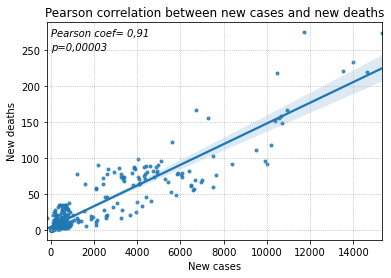

In [10]:
# PLOT 5: Pearson plot with new_cases x new_deaths
# Pearson correlation
pearson_coef,p_value=stats.pearsonr(total['new_cases'],total['new_deaths'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

fig, ax1 = plt.subplots()
x = df['new_cases'];
y = df['new_deaths'];
ax1 = sns.regplot(x=x, y=y, marker=".")
ax1.set_title('Pearson correlation between new cases and new deaths')
ax1.set_xlabel('New cases')
ax1.set_ylabel('New deaths')
ax1.grid(axis='both',linestyle=':')
ax1.plot(label='Pearson coef: 0,91')
ax1.plot(label='p=0,00003')
ax1.text(0,270,'Pearson coef= 0,91',style ='italic',fontsize = 10,color ="black") 
ax1.text(0,250,'p=0,00003',style ='italic',fontsize = 10,color ="black") 
plt.show()

In the plot 5 it's present a scatter plot between new cases and new deaths variables from March to December and also the Pearson correlation values between those. Taking into account the values it's safe to conclude that there's a large positive relationship between both variables, where for example a higher number of new cases can signify a higher number of deaths by the virus.